In [1]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
import os # accessing directory structure
from sklearn.metrics import accuracy_score
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import Model, layers
from keras.models import load_model, model_from_json
from keras.applications.mobilenet import MobileNet ,preprocess_input

import matplotlib.pyplot as plt

In [2]:
print(os.listdir('D:\data'))

['train', 'validation']


In [3]:
train_dir='D:\data/train'
test_dir='D:\data/validation'   #чужой против хищника датасет

In [5]:
import tensorflow as tf   

training=tf.keras.preprocessing.image.ImageDataGenerator(
    zca_epsilon=1e-06,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode="nearest",
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input,
).flow_from_directory(train_dir,batch_size=8,target_size=(224,224),subset="training")

validing=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode="nearest",
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input,
).flow_from_directory(test_dir,batch_size=8,target_size=(224,224),shuffle=True)

Found 694 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [6]:
mobilenet=MobileNet(include_top=False,weights='imagenet',input_shape=(224,224,3))

In [7]:
from keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization
model=Sequential([
    mobilenet,
    MaxPooling2D(3,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(256,activation='relu'),
    Dense(2,activation='softmax')  #softmax gives better result than sigmoid
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 1024)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 2)                 5

In [9]:
from tensorflow.keras.callbacks import  EarlyStopping
#e = EarlyStopping(patience=3,restore_best_weights= True) 
model.compile(loss='categorical_crossentropy', metrics=["accuracy"],optimizer='adam')
history=model.fit(training,validation_data=validing,epochs=20,batch_size=64, verbose=1)

Epoch 1/20
87/87 [==============================] - 66s 731ms/step - loss: 1.9857 - accuracy: 0.7248 - val_loss: 0.6680 - val_accuracy: 0.7900
Epoch 2/20
87/87 [==============================] - 85s 982ms/step - loss: 0.5996 - accuracy: 0.7867 - val_loss: 0.7154 - val_accuracy: 0.8200
Epoch 3/20
87/87 [==============================] - 81s 933ms/step - loss: 0.5007 - accuracy: 0.8040 - val_loss: 0.3603 - val_accuracy: 0.8350
Epoch 4/20
87/87 [==============================] - 75s 867ms/step - loss: 0.3847 - accuracy: 0.8516 - val_loss: 0.4823 - val_accuracy: 0.8350
Epoch 5/20
87/87 [==============================] - 63s 723ms/step - loss: 0.2653 - accuracy: 0.8919 - val_loss: 0.2797 - val_accuracy: 0.9100
Epoch 6/20
87/87 [==============================] - 63s 725ms/step - loss: 0.3403 - accuracy: 0.8602 - val_loss: 0.3953 - val_accuracy: 0.8800
Epoch 7/20
87/87 [==============================] - 68s 785ms/step - loss: 0.3025 - accuracy: 0.8790 - val_loss: 0.4334 - val_accuracy: 0.8300

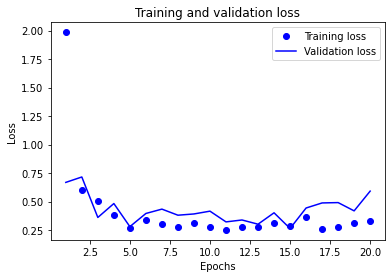

In [10]:
history_dict = history.history
history_dict.keys()

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [11]:
score = model.evaluate(validing) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

25/25 [==============================] - 7s 268ms/step - loss: 0.6957 - accuracy: 0.7750
Test score: 0.695720374584198
Test accuracy: 0.7749999761581421
